# 2021-10-16 per toolpath variation

Trying to have a look at how much variation is present per toolpath

As the toolpaths are generally fairly long, several images etc, we should be able to work out what the appropriate background/nominal is

Will probably be fairly similar to the per image frame analysis/quicklook

In [1]:
import sys
import os
import importlib # Used during testing if I need to reload modules

import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.stats
import scipy.signal
import pandas as pd

In [2]:
try:
    import ngif_romar.tools as tools
    import ngif_romar.plots.make_plots as plots
    import ngif_romar.plots.plots_tools as plots_tools
except ModuleNotFoundError as error:
    # If not in path/installed, use relative import
    module_path = os.path.abspath(os.path.join(".."))
    sys.path.append(module_path)
    import ngif_romar.tools as tools
    import ngif_romar.plots.make_plots as plots
    import ngif_romar.plots.plots_tools as plots_tools

In [3]:
ngif_thinwall_parent_path = os.path.abspath(os.path.join(
    "..",
    "data",
    "ngif_data_thinwall",
    "ngif data"
))
if os.path.isdir(ngif_thinwall_parent_path):
    print(os.listdir(ngif_thinwall_parent_path))

['20210831_1127_', '20210831_1615_', '20210902_1550_', '20210906_0918_', '20210906_1019_', '20210906_1339_', '20210913_0928_', 'ngif-wall']


## Start with NGIF-wall set

In [4]:
dataset_path = os.path.join(ngif_thinwall_parent_path, "ngif-wall")


logfile_path = os.path.join(dataset_path, "Data.dat")
meta_dict, data_df = tools.read_data(logfile_path)

data_df = tools.post_process_log_data(data_df)
data_df.head()

print(os.listdir(dataset_path))
frames_path = os.path.join(dataset_path, "Frames")

data_df = tools.link_camera_frames_to_df(data_df, frame_folder_path=frames_path)

print("Number of rows: {}, head:".format(len(data_df)))
data_df.head()

Data path C:\Users\Scott Williams\Documents\programming\ngif_romar\data\ngif_data_thinwall\ngif data\ngif-wall\Data.dat
['Data.dat', 'Frames']
Number of rows: 6885, head:


,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename
0,35399,0.0,0.0,0.0,0.0,0.0,9699,1901.0,2000,0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,-1.0,20210913_120207__35349.dat
1,35499,0.0,0.0,0.0,0.0,0.0,10321,1852.0,2000,0,...,0.0,0.0,0.0,100,0,0.0,0.0,0.0,0.0,20210913_120207__35349.dat
2,35599,0.0,0.0,0.0,0.0,0.0,10310,1848.0,2000,0,...,0.0,0.0,0.0,200,0,0.0,0.0,0.0,0.0,20210913_120207__35349.dat
3,35699,0.0,0.0,0.0,0.0,0.0,10503,1856.0,2000,0,...,0.0,0.0,0.0,300,0,0.0,0.0,0.0,0.0,20210913_120207__35349.dat
4,35799,0.0,0.0,0.0,0.0,0.0,10171,1853.0,2000,0,...,0.0,0.0,0.0,400,0,0.0,0.0,0.0,0.0,20210913_120207__35349.dat


In [5]:
print(len(np.unique(data_df["toolpath_key"])))

100


Below we have some histograms of the mean, std dev, and ratio of std dev to mean pool size per toolpath for one of the thinwall sets

The original idea was to see if we could build up a background idea of how much variation is present in a toolpath, and whether we can easily spot deviations

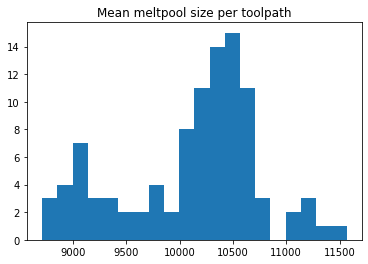

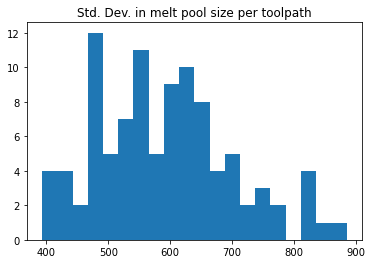

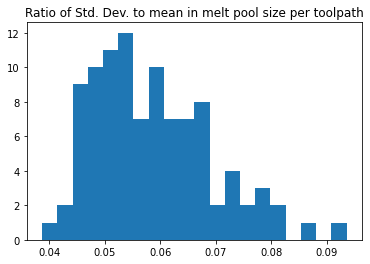

In [6]:
subset = data_df[
    data_df["laser_on_time(ms)"] > 100
]

bins = 20

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").mean()["meltpoolSize"], bins=bins)
ax.set_title("Mean meltpool size per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolSize"], bins=bins)
ax.set_title("Std. Dev. in melt pool size per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolSize"] / subset.groupby("toolpath_key").mean()["meltpoolSize"], bins=bins)
ax.set_title("Ratio of Std. Dev. to mean in melt pool size per toolpath")
plt.show()


So we have fewer statistics due to the number of toolpaths present, but hopefully the evaluations there will be more reliable

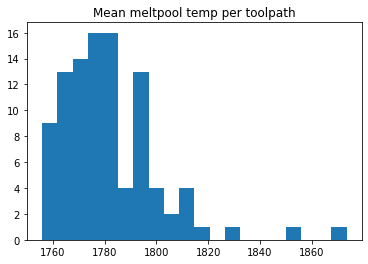

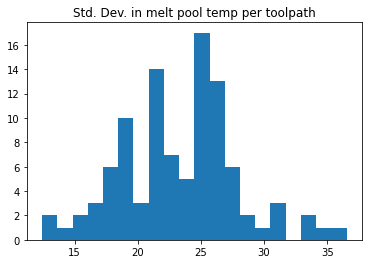

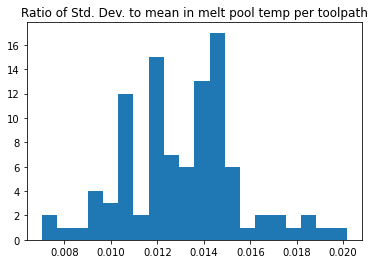

In [7]:
subset = data_df[
    data_df["laser_on_time(ms)"] > 100
]

bins = 20

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").mean()["meltpoolTemp"], bins=bins)
ax.set_title("Mean meltpool temp per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolTemp"], bins=bins)
ax.set_title("Std. Dev. in melt pool temp per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolTemp"] / subset.groupby("toolpath_key").mean()["meltpoolTemp"], bins=bins)
ax.set_title("Ratio of Std. Dev. to mean in melt pool temp per toolpath")
plt.show()


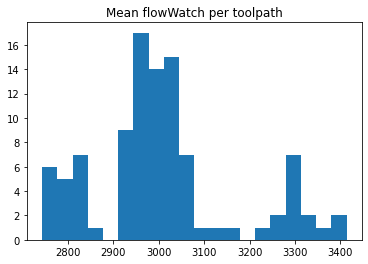

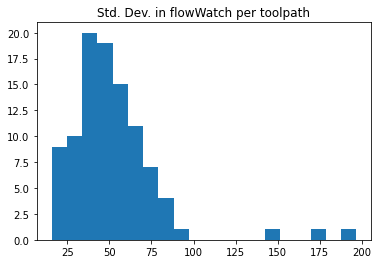

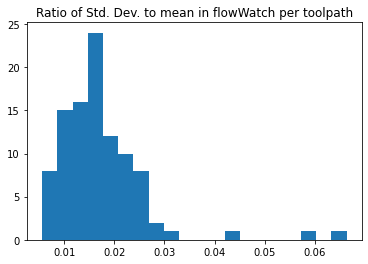

In [8]:
fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").mean()["flowWatch"], bins=bins)
ax.set_title("Mean flowWatch per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["flowWatch"], bins=bins)
ax.set_title("Std. Dev. in flowWatch per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["flowWatch"] / subset.groupby("toolpath_key").mean()["flowWatch"], bins=bins)
ax.set_title("Ratio of Std. Dev. to mean in flowWatch per toolpath")
plt.show()


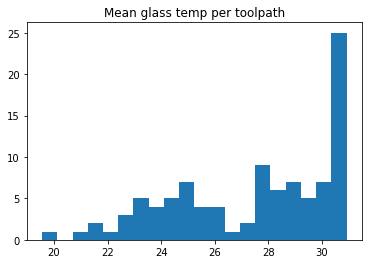

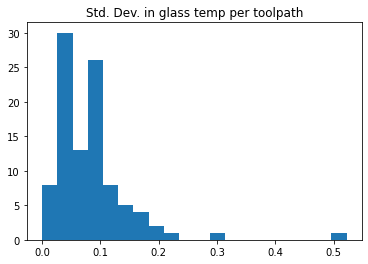

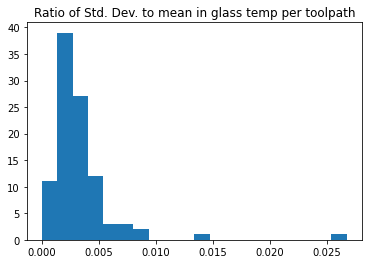

In [9]:
fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").mean()["protectionGlasTemperature"], bins=bins)
ax.set_title("Mean glass temp per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["protectionGlasTemperature"], bins=bins)
ax.set_title("Std. Dev. in glass temp per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["protectionGlasTemperature"] / subset.groupby("toolpath_key").mean()["protectionGlasTemperature"], bins=bins)
ax.set_title("Ratio of Std. Dev. to mean in glass temp per toolpath")
plt.show()


Similar to the per image frame stuff, most measured variables appear to have std dev around 1-2%, but the pool size is much larger

Show the meltpool size plots again, and we'll investigate the larger var sets

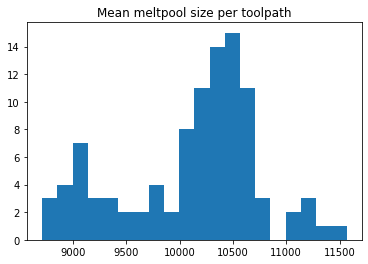

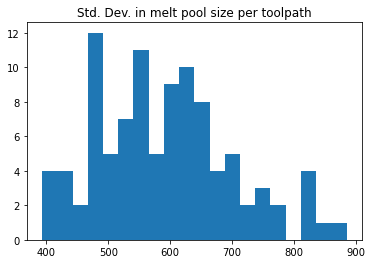

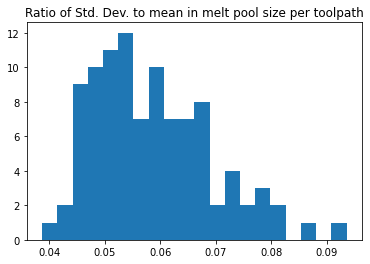

In [10]:
subset = data_df[
    data_df["laser_on_time(ms)"] > 100
]

bins = 20

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").mean()["meltpoolSize"], bins=bins)
ax.set_title("Mean meltpool size per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolSize"], bins=bins)
ax.set_title("Std. Dev. in melt pool size per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolSize"] / subset.groupby("toolpath_key").mean()["meltpoolSize"], bins=bins)
ax.set_title("Ratio of Std. Dev. to mean in melt pool size per toolpath")
plt.show()


Looked at the above plots, and saw there was a couple of toolpaths with larger std dev than the others, so I looked at them more closely

In [11]:
groupby = subset.groupby("toolpath_key").std().reset_index()
groupby[groupby["meltpoolSize"] > 800]

,toolpath_key,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,...,v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart
0,0.0,1890.767040,18.429545,0.755031,0.0,0.0,0.0,885.201146,24.956260,0.000000,...,0.000149,0.009025,0.062221,18.437062,0.000284,1890.767040,0.0,18.429545,0.755031,0.0
1,1.0,1919.635382,31.941572,0.000000,0.0,0.0,0.0,831.812031,34.958904,0.000000,...,0.000000,0.002963,1.472870,15.736874,0.001455,1919.635382,0.0,31.941572,0.000000,0.0
7,7.0,1919.635382,31.633480,0.000000,0.0,0.0,0.0,850.869748,26.183519,57.936546,...,0.000000,0.002918,1.471528,15.629675,0.001445,1919.635382,0.0,31.633480,0.000000,0.0
43,43.0,2727.941837,31.832069,0.000000,0.0,0.0,0.0,828.687423,26.035525,0.000000,...,0.000000,0.001861,1.468212,15.875363,0.001075,2727.941837,0.0,31.832069,0.000000,0.0
91,91.0,1919.635382,31.857768,0.000000,0.0,0.0,0.0,820.070563,23.393004,0.000000,...,0.000148,0.001849,1.469469,16.011485,0.001444,1919.635382,0.0,31.857768,0.000000,0.0
97,97.0,1919.635382,32.171659,0.000000,0.0,0.0,0.0,814.561305,24.530596,0.000000,...,0.000000,0.002248,1.475172,15.882950,0.001525,1919.635382,0.0,32.171659,0.000000,0.0


Look at toolpath 91, which has a high std dev in pool size

In [12]:
x = subset[
    subset["toolpath_key"] == 91
]
x

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename
6279,663302,53.407,-1.5,48.23,0.0,0.0,11496,1735.0,1400,0,...,-0.028079,53.428061,-0.000009,200,0,53.407,-1.5,48.23,91.0,20210913_121235__662921.dat
6280,663402,51.740,-1.5,48.23,0.0,0.0,11913,1754.0,1400,0,...,-0.028983,51.761739,-0.000009,300,0,51.740,-1.5,48.23,91.0,20210913_121235__662921.dat
6281,663502,50.074,-1.5,48.23,0.0,0.0,11976,1771.0,1400,0,...,-0.029947,50.096462,-0.000010,400,0,50.074,-1.5,48.23,91.0,20210913_121236__663922.dat
6282,663602,48.407,-1.5,48.23,0.0,0.0,11763,1792.0,1400,0,...,-0.030977,48.430235,-0.000011,500,0,48.407,-1.5,48.23,91.0,20210913_121236__663922.dat
6283,663702,46.740,-1.5,48.23,0.0,0.0,11419,1757.0,1400,0,...,-0.032081,46.764063,-0.000011,600,0,46.740,-1.5,48.23,91.0,20210913_121236__663922.dat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,669402,-48.460,-1.5,48.23,0.0,0.0,10326,1814.0,1400,0,...,-3.110649,48.483209,-0.000011,6300,0,-48.460,-1.5,48.23,91.0,20210913_121241__668927.dat
6341,669502,-50.126,-1.5,48.23,0.0,0.0,9991,1819.0,1400,0,...,-3.111677,50.148438,-0.000010,6400,0,-50.126,-1.5,48.23,91.0,20210913_121242__669928.dat
6342,669602,-51.793,-1.5,48.23,0.0,0.0,8842,1807.0,1400,0,...,-3.112639,51.814717,-0.000009,6500,0,-51.793,-1.5,48.23,91.0,20210913_121242__669928.dat
6343,669702,-53.460,-1.5,48.23,0.0,0.0,7175,1799.0,1400,0,...,-3.113542,53.481040,-0.000008,6600,0,-53.460,-1.5,48.23,91.0,20210913_121242__669928.dat


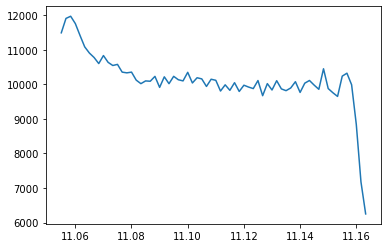

In [13]:
fig, ax = plt.subplots()
ax.plot(x["t(min)"], x["meltpoolSize"])
plt.show()

Issue: still picking up the ends of travel where the pool size starts to drop off

Do again, but remove the last ten seconds of each toolpath?

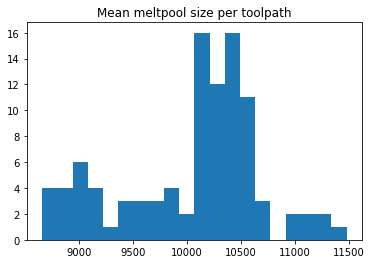

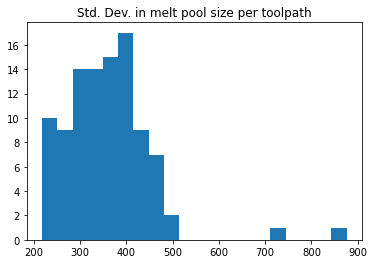

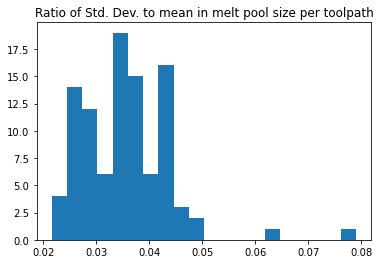

In [14]:
subset = data_df[
    (data_df["laser_on_time(ms)"] > 100)
    & (np.abs(data_df["x"]) < 45)
]

bins = 20

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").mean()["meltpoolSize"], bins=bins)
ax.set_title("Mean meltpool size per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolSize"], bins=bins)
ax.set_title("Std. Dev. in melt pool size per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolSize"] / subset.groupby("toolpath_key").mean()["meltpoolSize"], bins=bins)
ax.set_title("Ratio of Std. Dev. to mean in melt pool size per toolpath")
plt.show()


In [15]:
groupby = subset.groupby("toolpath_key").std().reset_index()
groupby[groupby["meltpoolSize"] > 450]

,toolpath_key,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,...,v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart
0,0.0,1688.687854,14.192814,0.745221,0.0,0.0,0.0,875.696756,23.453117,0.0,...,0.0,0.009181,0.065871,14.205746,0.000301,1688.687854,0.0,14.192814,0.745221,0.0
1,1.0,1573.213272,26.176726,0.000000,0.0,0.0,0.0,733.734773,34.539827,0.0,...,0.0,0.002453,1.457091,12.801876,0.001593,1573.213272,0.0,26.176726,0.000000,0.0
43,43.0,2237.185732,26.101253,0.000000,0.0,0.0,0.0,471.988828,21.901132,0.0,...,0.0,0.001454,1.451610,13.006952,0.001177,2237.185732,0.0,26.101253,0.000000,0.0
45,45.0,2237.185732,26.050015,0.000000,0.0,0.0,0.0,493.163390,20.579780,0.0,...,0.0,0.001669,1.453225,12.821993,0.001193,2237.185732,0.0,26.050015,0.000000,0.0
58,58.0,1573.213272,26.154138,0.000000,0.0,0.0,0.0,452.511911,16.338071,0.0,...,0.0,0.002245,1.458934,12.745470,0.001637,1573.213272,0.0,26.154138,0.000000,0.0
80,80.0,1573.213272,26.272307,0.000000,0.0,0.0,0.0,467.323547,20.179869,0.0,...,0.0,0.001816,1.453663,13.166292,0.001582,1573.213272,0.0,26.272307,0.000000,0.0
84,84.0,1544.344521,25.942887,0.000000,0.0,0.0,0.0,465.771153,15.996802,0.0,...,0.0,0.002609,1.451882,13.037328,0.001599,1544.344521,0.0,25.942887,0.000000,0.0
88,88.0,1573.213272,26.161937,0.000000,0.0,0.0,0.0,457.760604,21.691415,0.0,...,0.0,0.002333,1.455731,12.934127,0.001579,1573.213272,0.0,26.161937,0.000000,0.0
92,92.0,1573.213272,26.061181,0.000000,0.0,0.0,0.0,464.931700,19.953265,0.0,...,0.0,0.003319,1.454027,12.933358,0.001591,1573.213272,0.0,26.061181,0.000000,0.0
94,94.0,1602.081979,26.471517,0.000000,0.0,0.0,0.0,455.266633,18.727534,0.0,...,0.0,0.002765,1.457646,13.014811,0.001568,1602.081979,0.0,26.471517,0.000000,0.0


In [16]:
x = subset[
    subset["toolpath_key"] == 45
]
x

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename
3084,343802,44.139,-1.5,23.85,0.0,0.0,11039,1763.0,1400,0,...,-0.033970,44.164480,-0.000009,1000,0,44.139,-1.5,23.85,45.0,20210913_120715__343629.dat
3085,343902,42.973,-1.5,23.85,0.0,0.0,10401,1759.0,1400,0,...,-0.034891,42.999171,-0.000009,1100,0,42.973,-1.5,23.85,45.0,20210913_120715__343629.dat
3086,344002,41.853,-1.5,23.85,0.0,0.0,10784,1760.0,1400,0,...,-0.035824,41.879871,-0.000010,1200,0,41.853,-1.5,23.85,45.0,20210913_120715__343629.dat
3087,344102,40.686,-1.5,23.85,0.0,0.0,10660,1750.0,1400,0,...,-0.036851,40.713641,-0.000011,1300,0,40.686,-1.5,23.85,45.0,20210913_120715__343629.dat
3088,344202,39.473,-1.5,23.85,0.0,0.0,10369,1765.0,1400,0,...,-0.037982,39.501490,-0.000011,1400,0,39.473,-1.5,23.85,45.0,20210913_120716__344629.dat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,351002,-39.627,-1.5,23.85,0.0,0.0,9888,1767.0,1400,0,...,-3.103758,39.655380,-0.000011,8200,0,-39.627,-1.5,23.85,45.0,20210913_120722__350635.dat
3157,351102,-40.747,-1.5,23.85,0.0,0.0,10695,1808.0,1400,0,...,-3.104797,40.774600,-0.000010,8300,0,-40.747,-1.5,23.85,45.0,20210913_120722__350635.dat
3158,351202,-41.914,-1.5,23.85,0.0,0.0,10819,1823.0,1400,0,...,-3.105820,41.940832,-0.000011,8400,0,-41.914,-1.5,23.85,45.0,20210913_120723__351636.dat
3159,351302,-43.221,-1.5,23.85,0.0,0.0,10733,1839.0,1400,0,...,-3.106901,43.247021,-0.000010,8500,0,-43.221,-1.5,23.85,45.0,20210913_120723__351636.dat


Now that we've gotten rid of some of the points around the end of travel we've reduced the std dev a fair amount, however there are still some strange sections, like toolpath 45 (above, below). It appears to be travelling along consistently, and then picks up back and forth fluctuations

This might be something to look for

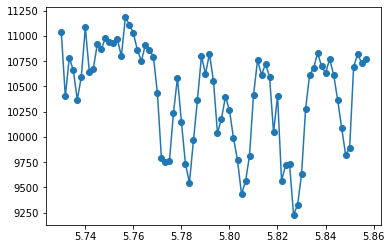

In [17]:
fig, ax = plt.subplots()
ax.plot(x["t(min)"], x["meltpoolSize"], marker='o')
plt.show()

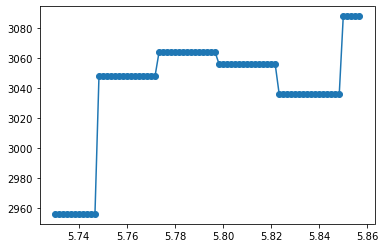

In [18]:
fig, ax = plt.subplots()
ax.plot(x["t(min)"], x["flowWatch"], marker='o')
plt.show()

Okay, similar thing, once we clip off the turn around bits the size is fairly consistent, but there appears to also be a sawtooth pattern?

Another thing to check, is the pool size mean or std dev increasing with toolpath?

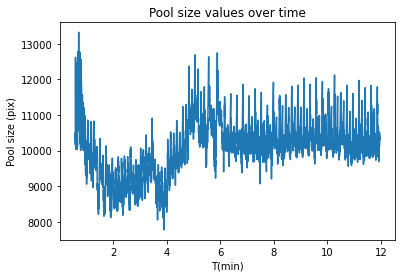

In [19]:
fig, ax = plt.subplots()
ax.plot(subset["t(min)"], subset["meltpoolSize"])
ax.set_title("Pool size values over time")
ax.set_xlabel("T(min)")
ax.set_ylabel("Pool size (pix)")
plt.show()


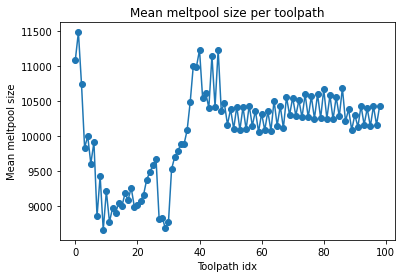

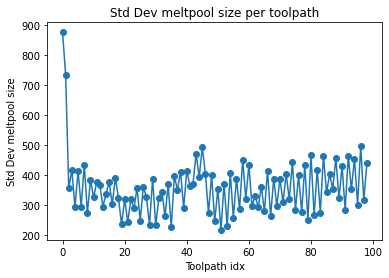

In [20]:
groupby = subset.groupby("toolpath_key").mean().reset_index()

fig, ax = plt.subplots()
ax.plot(groupby["toolpath_key"], groupby["meltpoolSize"], marker='o')
ax.set_title("Mean meltpool size per toolpath")
ax.set_xlabel("Toolpath idx")
ax.set_ylabel("Mean meltpool size")
plt.show()

groupby = subset.groupby("toolpath_key").std().reset_index()

fig, ax = plt.subplots()
ax.plot(groupby["toolpath_key"], groupby["meltpoolSize"], marker='o')
ax.set_title("Std Dev meltpool size per toolpath")
ax.set_xlabel("Toolpath idx")
ax.set_ylabel("Std Dev meltpool size")
plt.show()



Okay, so greater variation right at the start, then somewhat consistent?

Do any of these plots tell us about the build?

Below: I attemped to see if we could learn anything using the autocorrelation; the correlation of future values with past values

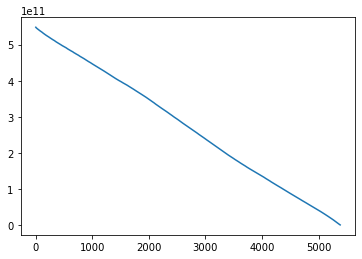

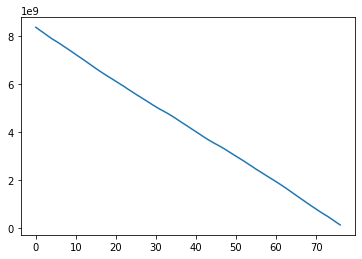

In [21]:
# Autocorrelation is correlation of series with itself, take the first half to get causal events?
# https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html
# https://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation

def autocorr(x):
    # https://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]
result = autocorr(subset["meltpoolSize"])

fig, ax = plt.subplots()
ax.plot(result)
plt.show()

# Doesn't say much for whole set

result = autocorr(x["meltpoolSize"])
fig, ax = plt.subplots()
ax.plot(result)
plt.show()

In the below plots I attempt to see if there's any periodic variation that can be picked up in a Lomb-Scargle

I'm not sure about aliasing etc, but maybe some variation present every 6 seconds? That might be close to a period of travel though

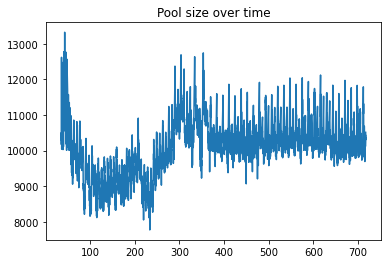

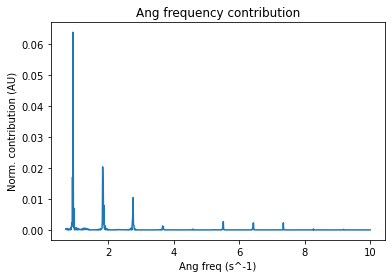

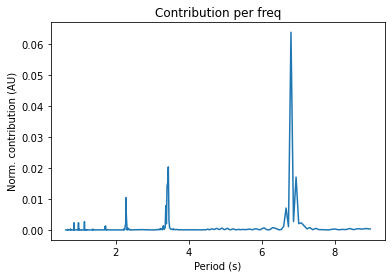

In [22]:
# Final check, try lomb scargle
freqs = np.linspace(0.7, 10, 1000)
pgram = scipy.signal.lombscargle(subset["t(s)"], subset["meltpoolSize"], freqs, normalize=True)

fig, ax = plt.subplots()
ax.plot(subset["t(s)"], subset["meltpoolSize"])
ax.set_title("Pool size over time")
plt.show()

fig, ax = plt.subplots()
ax.set_title("Ang frequency contribution")
ax.set_xlabel("Ang freq (s^-1)")
ax.set_ylabel("Norm. contribution (AU)")
ax.plot(freqs, pgram)
plt.show()

fig, ax = plt.subplots()
ax.plot(1 / freqs * (2*np.pi), pgram)
ax.set_title("Contribution per freq")
ax.set_xlabel("Period (s)")
ax.set_ylabel("Norm. contribution (AU)")
plt.show()

It's often hard to interpret frequency/period components, but looks like there's a distinct signal with period of around 7s?

See below for another example of using lomb scargle to pick out freqs/periods

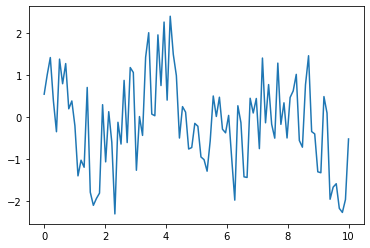

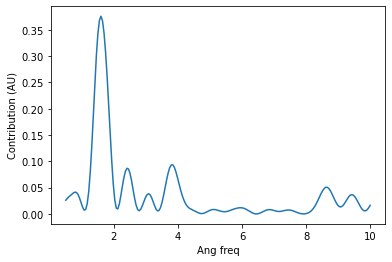

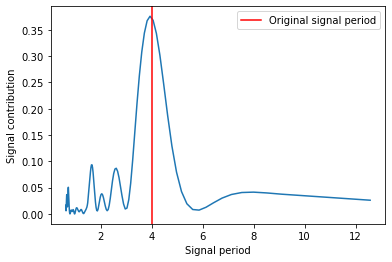

In [23]:
# Double checking ang frequency convention of Lomb Scargle
ts = np.linspace(0, 10, 100)
period = 4
ang_freq = 2 * np.pi / period
ys = np.cos(ang_freq * ts + 0.05) + np.random.uniform(-1.5, 1.5, size=ts.shape)

fig, ax = plt.subplots()
ax.plot(ts, ys)
plt.show()

freqs = np.linspace(0.5, 10, 200)
pgram = scipy.signal.lombscargle(ts, ys, freqs, normalize=True)

fig, ax = plt.subplots()
ax.plot(freqs, pgram)
ax.set_xlabel("Ang freq")
ax.set_ylabel("Contribution (AU)")
plt.show()

fig, ax = plt.subplots()
ax.plot(1/freqs * (2 * np.pi), pgram)
ax.axvline(period, label="Original signal period", color="#FF0000FF")
ax.set_xlabel("Signal period")
ax.set_ylabel("Signal contribution")
ax.legend()
plt.show()

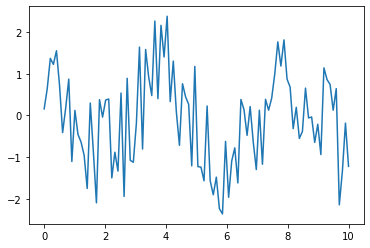

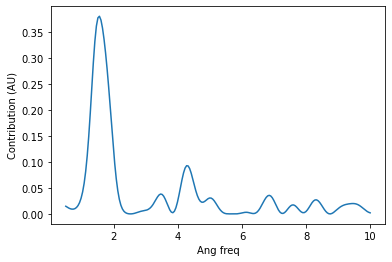

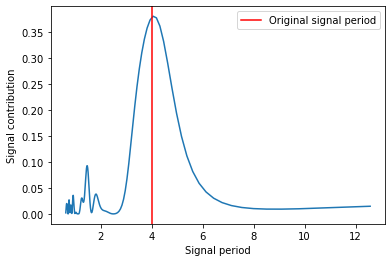

In [24]:
# Double checking ang frequency convention of Lomb Scargle
# Defining spectrum in terms of periods, to double check

ts = np.linspace(0, 10, 100)
period = 4
ang_freq = 2 * np.pi / period
ys = np.cos(ang_freq * ts + 0.05) + np.random.uniform(-1.5, 1.5, size=ts.shape)

fig, ax = plt.subplots()
ax.plot(ts, ys)
plt.show()


periods = np.linspace(1, 10, 100)
freqs = 1/periods * 2 * np.pi
freqs = np.linspace(0.5, 10, 200)
pgram = scipy.signal.lombscargle(ts, ys, freqs, normalize=True)

fig, ax = plt.subplots()
ax.plot(freqs, pgram)
ax.set_xlabel("Ang freq")
ax.set_ylabel("Contribution (AU)")
plt.show()

fig, ax = plt.subplots()
ax.plot(1/freqs * (2 * np.pi), pgram)
ax.axvline(period, label="Original signal period", color="#FF0000FF")
ax.set_xlabel("Signal period")
ax.set_ylabel("Signal contribution")
ax.legend()
plt.show()

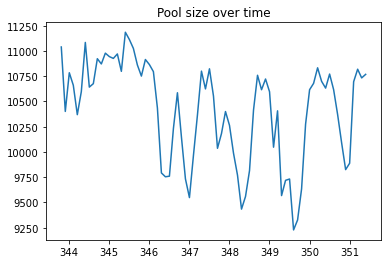

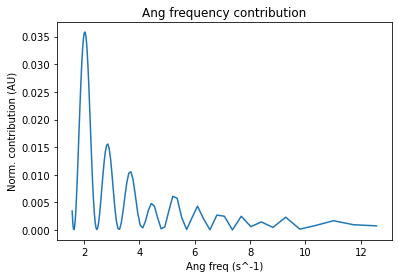

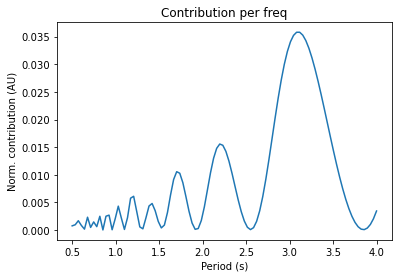

In [25]:
x = subset[
    (subset["toolpath_key"] == 45)
#     & (subset["t(s)"] > 346)
]

# Final check, try lomb scargle
periods = np.linspace(0.5, 4, 100)
freqs = 1/periods * 2 * np.pi
# freqs = np.linspace(0.75, 15, 1000)
pgram = scipy.signal.lombscargle(x["t(s)"], x["meltpoolSize"], freqs, normalize=True)

fig, ax = plt.subplots()
ax.plot(x["t(s)"], x["meltpoolSize"])
ax.set_title("Pool size over time")
plt.show()

fig, ax = plt.subplots()
ax.set_title("Ang frequency contribution")
ax.set_xlabel("Ang freq (s^-1)")
ax.set_ylabel("Norm. contribution (AU)")
ax.plot(freqs, pgram)
plt.show()

fig, ax = plt.subplots()
ax.plot(1 / freqs * (2*np.pi), pgram)
ax.set_title("Contribution per freq")
ax.set_xlabel("Period (s)")
ax.set_ylabel("Norm. contribution (AU)")
plt.show()

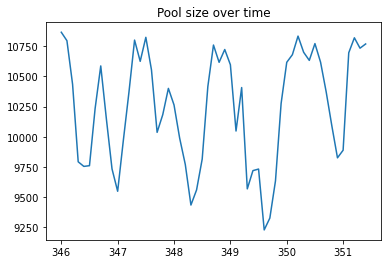

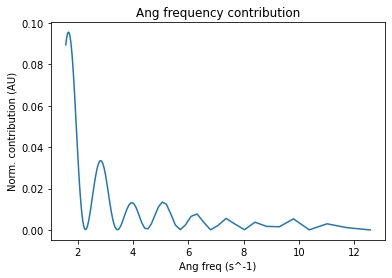

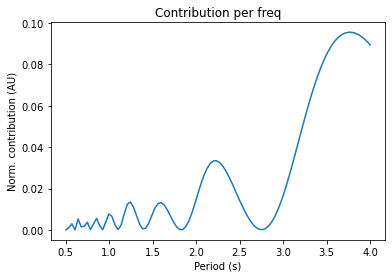

In [26]:
x = subset[
    (subset["toolpath_key"] == 45)
    & (subset["t(s)"] > 346)
]

# Final check, try lomb scargle
periods = np.linspace(0.5, 4, 100)
freqs = 1/periods * 2 * np.pi
# freqs = np.linspace(0.75, 15, 1000)
pgram = scipy.signal.lombscargle(x["t(s)"], x["meltpoolSize"], freqs, normalize=True)

fig, ax = plt.subplots()
ax.plot(x["t(s)"], x["meltpoolSize"])
ax.set_title("Pool size over time")
plt.show()

fig, ax = plt.subplots()
ax.set_title("Ang frequency contribution")
ax.set_xlabel("Ang freq (s^-1)")
ax.set_ylabel("Norm. contribution (AU)")
ax.plot(freqs, pgram)
plt.show()

fig, ax = plt.subplots()
ax.plot(1 / freqs * (2*np.pi), pgram)
ax.set_title("Contribution per freq")
ax.set_xlabel("Period (s)")
ax.set_ylabel("Norm. contribution (AU)")
plt.show()

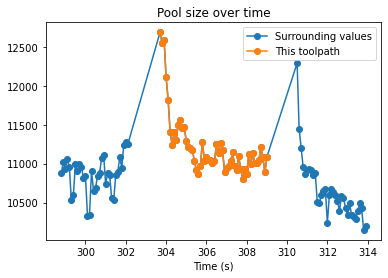

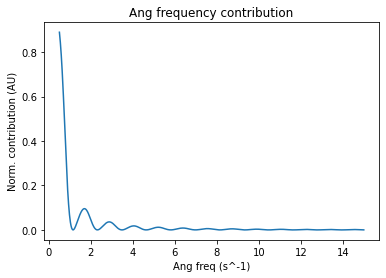

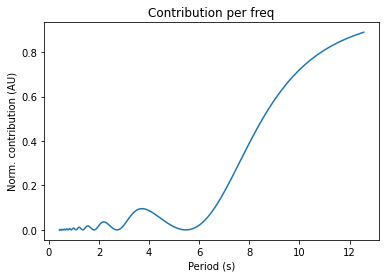

In [27]:
x = subset[
#     subset["toolpath_key"] == 90
    subset["toolpath_key"] == 40
]
outside = subset[
    (subset["t"] > x["t"].min() - 5000)
    & (subset["t"] < x["t"].max() + 5000)
]


# Final check, try lomb scargle
freqs = np.linspace(0.5, 15, 1000)
pgram = scipy.signal.lombscargle(x["t(s)"], x["meltpoolSize"], freqs, normalize=True)

fig, ax = plt.subplots()
ax.plot(outside["t(s)"], outside["meltpoolSize"], label="Surrounding values", marker='o')
ax.plot(x["t(s)"], x["meltpoolSize"], marker='o', label="This toolpath")
ax.set_title("Pool size over time")
ax.set_xlabel("Time (s)")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.set_title("Ang frequency contribution")
ax.set_xlabel("Ang freq (s^-1)")
ax.set_ylabel("Norm. contribution (AU)")
ax.plot(freqs, pgram)
plt.show()

fig, ax = plt.subplots()
ax.plot(1 / freqs * (2*np.pi), pgram)
ax.set_title("Contribution per freq")
ax.set_xlabel("Period (s)")
ax.set_ylabel("Norm. contribution (AU)")
plt.show()

Just having a look at some sections, it looks like later on we start with a higher melt pool size which then drops off

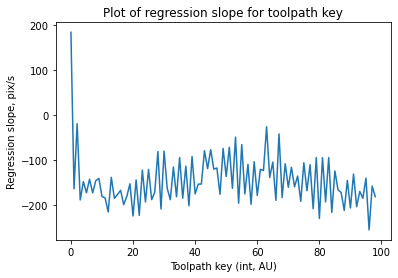

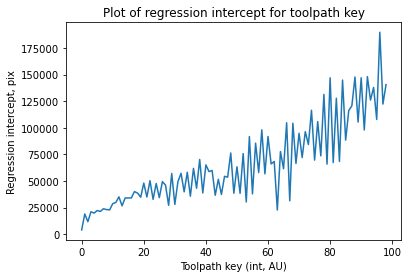

In [28]:
# Try fitting a linear model, see how often we have something decreasing with time

params = []
for toolpath_key in np.unique(subset["toolpath_key"]):
    this_subset = subset[
        subset["toolpath_key"] == toolpath_key
    ]
    test_func = lambda time, a, b: a * time + b

    result = scipy.optimize.curve_fit(test_func, this_subset["t(s)"].values, this_subset["meltpoolSize"].values)
    params.append(result[0])

params = np.array(params)

fig, ax = plt.subplots()
ax.plot(np.unique(subset["toolpath_key"]), params[:,0])
ax.set_title("Plot of regression slope for toolpath key")
ax.set_xlabel("Toolpath key (int, AU)")
ax.set_ylabel("Regression slope, pix/s")
plt.show()

fig, ax = plt.subplots()
ax.plot(np.unique(subset["toolpath_key"]), params[:,1])
ax.set_title("Plot of regression intercept for toolpath key")
ax.set_xlabel("Toolpath key (int, AU)")
ax.set_ylabel("Regression intercept, pix")
plt.show()

In [29]:
xs = np.linspace(-10, 10, 100)
ys = xs**2 + np.random.uniform(-1, -1, size=xs.shape)

test_func = lambda x, a,b,c: a*x**2 + b*x + c

scipy.optimize.curve_fit(test_func, xs, ys)

(array([ 1.00000000e+00,  3.93484131e-09, -1.00000000e+00]),
 array([[ 5.91539736e-21, -6.69245642e-22, -1.99583948e-19],
        [-6.69245642e-22,  1.00792607e-20, -1.02785226e-21],
        [-1.99583948e-19, -1.02785226e-21,  1.22196090e-17]]))

## Also try looking at other data with longer paths


In [30]:
other_data_parent_path = os.path.abspath(os.path.join(
    "..",
    "data",
))    
other_data_set_paths = [os.path.abspath(os.path.join("..", "data", i)) for i in ["SN2", "SN3", "SN5", "SN6"]]

os.listdir(other_data_set_paths[0])
for dataset_parent in other_data_set_paths:
    for folder in os.listdir(dataset_parent):
        # Load data
        logfile_path = os.path.join(dataset_parent, folder, "Data.dat")
        meta_dict, this_data_df = tools.read_data(logfile_path)
        this_data_df = tools.post_process_log_data(this_data_df)
        print(os.listdir(dataset_path))
        frames_path = os.path.join(dataset_path, "Frames")
        this_data_df = tools.link_camera_frames_to_df(this_data_df, frame_folder_path=frames_path)
        
        break
    break

Data path C:\Users\Scott Williams\Documents\programming\ngif_romar\data\SN2\20200930_1500_\Data.dat
['Data.dat', 'Frames']


In [31]:
print(len(np.unique(this_data_df["toolpath_key"])))

87


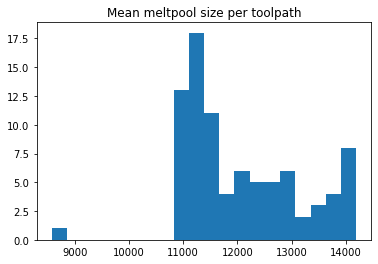

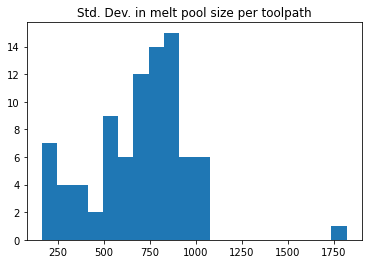

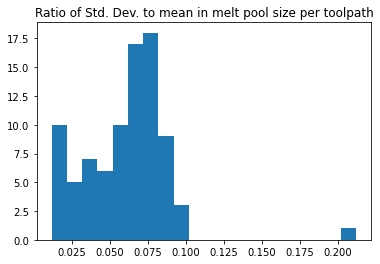

In [32]:
subset = this_data_df[
    this_data_df["laser_on_time(ms)"] > 100
]

bins = 20

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").mean()["meltpoolSize"], bins=bins)
ax.set_title("Mean meltpool size per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolSize"], bins=bins)
ax.set_title("Std. Dev. in melt pool size per toolpath")
plt.show()

fig, ax = plt.subplots()
ax.hist(subset.groupby("toolpath_key").std()["meltpoolSize"] / subset.groupby("toolpath_key").mean()["meltpoolSize"], bins=bins)
ax.set_title("Ratio of Std. Dev. to mean in melt pool size per toolpath")
plt.show()


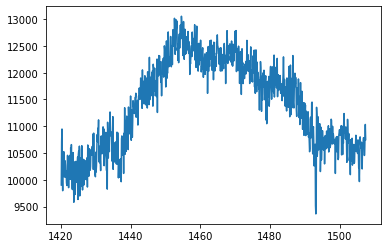

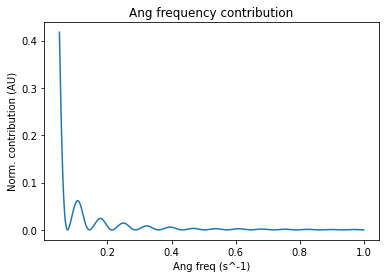

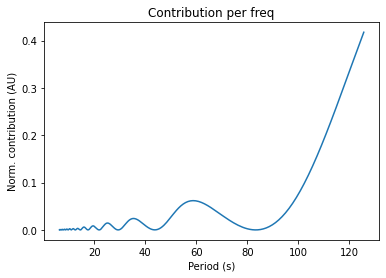

In [33]:
this_subset = this_data_df[
    this_data_df["toolpath_key"] == 15
]

fig, ax = plt.subplots()
ax.plot(this_subset["t(s)"], this_subset["meltpoolSize"])
plt.show()

freqs = np.linspace(0.05, 1, 1000)
pgram = scipy.signal.lombscargle(this_subset["t(s)"], this_subset["meltpoolSize"], freqs, normalize=True)


fig, ax = plt.subplots()
ax.set_title("Ang frequency contribution")
ax.set_xlabel("Ang freq (s^-1)")
ax.set_ylabel("Norm. contribution (AU)")
ax.plot(freqs, pgram)
plt.show()

fig, ax = plt.subplots()
ax.plot(1 / freqs * (2*np.pi), pgram)
ax.set_title("Contribution per freq")
ax.set_xlabel("Period (s)")
ax.set_ylabel("Norm. contribution (AU)")
plt.show()

If we want to be able to judge defects by the machine operating strangely, we'll need to have a good idea of what is expected at each point

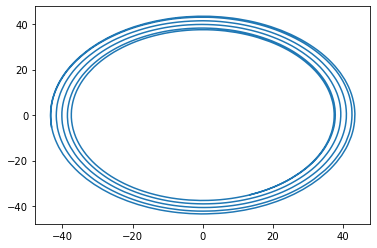

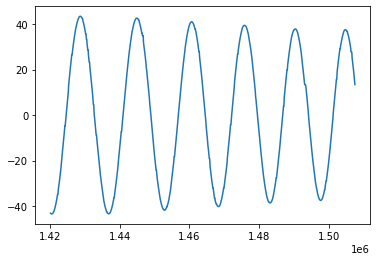

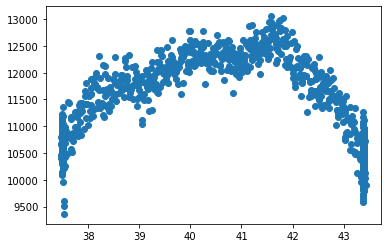

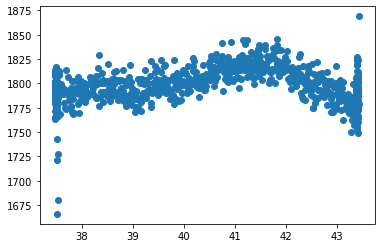

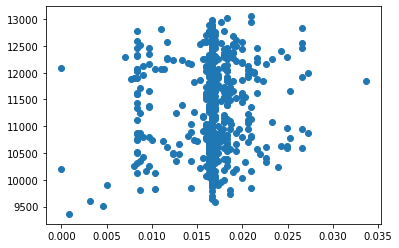

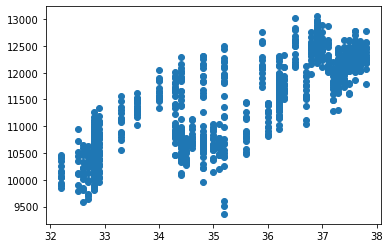

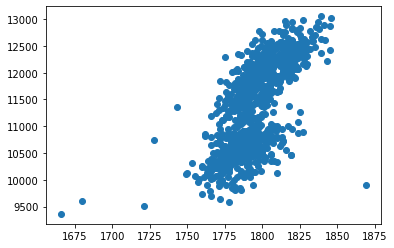

In [34]:
fig, ax = plt.subplots()
ax.plot(this_subset["x"], this_subset["y"])
plt.show()

fig, ax = plt.subplots()
ax.plot(this_subset["t"], this_subset["x"])
plt.show()

fig, ax = plt.subplots()
ax.scatter(this_subset["r(mm)"], this_subset["meltpoolSize"])
plt.show()

fig, ax = plt.subplots()
ax.scatter(this_subset["r(mm)"], this_subset["meltpoolTemp"])
plt.show()

fig, ax = plt.subplots()
ax.scatter(this_subset["|v|(mm/ms)"], this_subset["meltpoolSize"])
plt.show()

fig, ax = plt.subplots()
ax.scatter(this_subset["protectionGlasTemperature"], this_subset["meltpoolSize"])
plt.show()

fig, ax = plt.subplots()
ax.scatter(this_subset["meltpoolTemp"], this_subset["meltpoolSize"])
plt.show()

Meltpool temp vs size scatter plot separated into two regions?

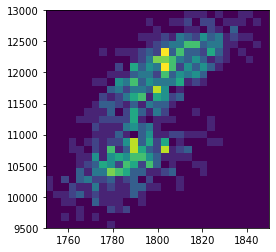

In [35]:

bins = [
    np.linspace(1750, 1850, 30),
    np.linspace(9500,13000,30),
]
fig, ax = plt.subplots(figsize=(4,4))
ax.hist2d(this_subset["meltpoolTemp"], this_subset["meltpoolSize"], bins=bins)
plt.show()

In [36]:
this_subset.corr()

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key
t,1.000000,0.074864,-0.062654,NaN,NaN,NaN,0.114487,-0.050726,NaN,NaN,...,-0.018407,-0.058610,-0.987556,-0.270648,1.000000,NaN,0.074864,-0.062654,NaN,NaN
x,0.074864,1.000000,-0.030138,NaN,NaN,NaN,-0.046758,-0.075632,NaN,NaN,...,-0.003251,-0.048458,-0.061328,-0.015340,0.074864,NaN,1.000000,-0.030138,NaN,NaN
y,-0.062654,-0.030138,1.000000,NaN,NaN,NaN,-0.018486,-0.073186,NaN,NaN,...,0.015215,0.773519,0.047447,-0.002783,-0.062654,NaN,-0.030138,1.000000,NaN,NaN
z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meltpoolSize,0.114487,-0.046758,-0.018486,NaN,NaN,NaN,1.000000,0.668758,NaN,NaN,...,0.069280,-0.045822,-0.072088,-0.081848,0.114487,NaN,-0.046758,-0.018486,NaN,NaN
meltpoolTemp,-0.050726,-0.075632,-0.073186,NaN,NaN,NaN,0.668758,1.000000,NaN,NaN,...,0.120743,-0.107134,0.085606,-0.089801,-0.050726,NaN,-0.075632,-0.073186,NaN,NaN
LaserPower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stirrerValue_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Meltpool larger at sections where more material is available?